# Bài toán đối ngẫu Lagrange
$$\text{min } L^*(\mathbf{a})=-\sum_{n=1}^N{a_n} + \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N{a_n a_m t_n t_m \mathbf{x}_n\mathbf{x}_m}$$
subject to:
$$-a_n \leq 0$$
$$\sum_{n=1}^N{a_n t_n} = 0 $$

## Biến đổi
Đặt $\mathbf{v} = \left[t_1 \mathbf{x}_1, t_2 \mathbf{x}_2, \dots, t_N \mathbf{x}_N \right]; \mathbf{1} = [1, 1, \dots, 1]^T$

Ta có: 
$$\mathbf{a} = [a_1, a_2, \dots, a_N]^T$$
$$\mathbf{w} = \sum_{n=1}^N{a_n t_n \mathbf{x}_n}
= \mathbf{v} \mathbf{a}
$$

$$||\mathbf{w}||^2 
= \mathbf{w}^T \mathbf{w} 
= (\mathbf{v} \mathbf{a})^T (\mathbf{v} \mathbf{a})
= \mathbf{a}^T\mathbf{v}^T\mathbf{v}\mathbf{a}
$$

$$
\sum_{n=1}^N\sum_{m=1}^N{a_n a_m t_n t_m \mathbf{x}_n \mathbf{x}_m} 
= ||\mathbf{w}||^2 
= \mathbf{a}^T\mathbf{v}^T\mathbf{v}\mathbf{a}
$$
$$
\sum_{n=1}^N{a_n}
=  \mathbf{1}^T\mathbf{a}
$$
## Bài toán trở thành:
$$
\text{min} L^*(\mathbf{a}) = -\mathbf{1}^T\mathbf{a} + \frac{1}{2}\mathbf{a}^T\mathbf{v}^T\mathbf{v}\mathbf{a}
$$
Điều kiện:
$$-\mathbf{a} \preceq 0$$
$$ \mathbf{t}\mathbf{a} = 0$$

# Sinh dữ liệu ngẫu nhiên

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
print(X.shape, y.shape)
print(y)

(2, 20) (1, 20)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]


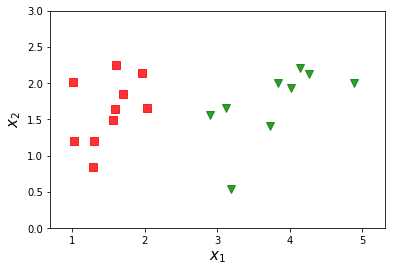

In [2]:
plt.plot(X0[:, 0], X0[:, 1], 'rs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'gv', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.show()

## Sử dụng cvxopt

In [3]:
from cvxopt import matrix, solvers
n = 2*N
# min 
# build P
# v_n = t_n*x_n
V = np.concatenate((X0.T, -X1.T), axis = 1)
# 0.5(v_T.v)*(a_T.a)
# P = 2*0.5*v_T*v = v_T*v
P = matrix(V.T.dot(V))
# build q
# -a*X
# q = -X
q = matrix(-np.ones((n, 1)))
# build A, b, G, h 
# -a_n <= 0 
# G = -eye(n)
# h = zeros(n)
G = matrix(-np.eye(n))
h = matrix(np.zeros((n, 1)))
# sum(a_n*y_n) = 0
# A = y
# b = 0
A = matrix(y)
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
print(P.size, q.size, G.size, h.size, A.size, b.size)
lambd = np.array(sol['x'])
print('lambda = \n', lambd.T)

(20, 20) (20, 1) (20, 20) (20, 1) (1, 20) (1, 1)
lambda = 
 [[ 3.21465359e-10  1.01674891e-09  6.20677419e-10  1.21656732e-09
   4.94957590e-08  4.01711994e-09  1.66754895e-09  3.62681022e-09
   5.52658952e-10  2.61059703e+00 -1.30580545e-10  4.15948895e-10
   5.73175076e-09  1.18291588e-10  2.61059708e+00  2.28225920e-10
   1.26707836e-10  5.70849242e-11  1.45274847e-09  3.11622195e-11]]


In [4]:
support = np.where(lambd > 1e-6)[0]

V_support = V[:, support]
X_support = X[:, support]
y_support = y[:, support]
lambd_support = lambd[support]
# calculate w and b
w = V_support.dot(lambd_support)
b = np.mean(y_support.T - w.T.dot(X_support))

print('w = ', w.T)
print('b = ', b)

w =  [[-2.27279643  0.23577738]]
b =  5.23426716980929


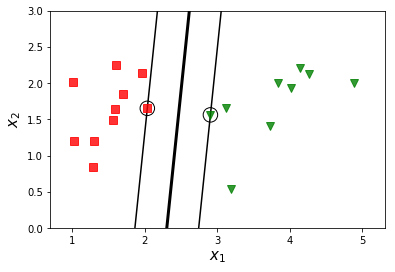

In [5]:
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

plt.plot(X0[:, 0], X0[:, 1], 'rs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'gv', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# add circles around support vectors 
for m in support:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)


plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.show()

## Sử dụng sklearn

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
y = y.reshape((2*N,))
clf.fit(X.T, y) # each sample is one row

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

w =  [[-2.27279693  0.23577753]]
b =  [5.23426814]


# Tính tay cho 3 điểm

In [7]:
X0 = np.array([[1.0,1.0],[2.0,2.0]])
X1 = np.array([[0.0,3.0]])
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.array([[1.0,1.0,-1.0]])
print(X.shape)
print(y)

(2, 3)
[[ 1.  1. -1.]]


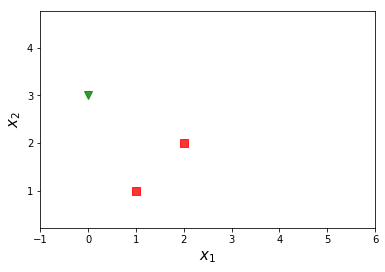

In [8]:
plt.plot(X0[:, 0], X0[:, 1], 'rs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'gv', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(-1, 6)
plt.xlim(-1, 6)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.show()

## Tính tay

Dữ liệu:
$$
x_1 = [1,1]^T, t_1=1
$$
$$
x_2 = [2,2]^T, t_2=1
$$
$$
x_3 = [0,3]^T, t_3=-1
$$
$$a = [a_1, a_2, a_3]^T $$

Bài toán:
$$\text{min }L^*(\mathbf{a})
=-\sum_{n=1}^N{a_n} + \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N{a_n a_m t_n t_m \mathbf{x}_n \mathbf{x}_m}
$$

Điều kiện:
$$\sum_{n=1}^N{a_n t_n} = 0 $$
$$-a_n \leq 0$$
Ta đặt: 
$$S = L^*(\mathbf{a}) + c\sum_{n=1}^N{a_n t_n}$$
$$\mathbf{v} = [t_1\mathbf{x_1}, t_2\mathbf{x_2}, t_3\mathbf{x_3}] \Rightarrow v_1 = [1,1]^T; v_2 = [2,2]^T; v_3 = [0,-3]^T$$
Đạo hàm:
$$
\frac{\partial S}{\partial a_1} 
= -1 + \frac{1}{2}(2a_1 v_1 \cdot v_1 + 2a_2 v_1 \cdot v_2 + 2a_3 v_1 \cdot v_3) + c\\
= -1 + 2a_1 + 4a_2 -3a_3 + c = 0 \\
$$
$$
\frac{\partial S}{\partial a_2} 
= -1 + \frac{1}{2}(2a_2 v_2 \cdot v_2 + 2a_1 v_2 \cdot v_1 + 2a_3 v_2 \cdot v_3) + c\\
= -1 + 8a_2 + 4a_1 -6a_3 + c = 0\\
$$
$$
\frac{\partial S}{\partial a_3} 
= -1 + \frac{1}{2}(2a_3 v_3 \cdot v_3 + 2a_2 v_3 \cdot v_2 + 2a_1 v_3 \cdot v_1) - c\\
= -1 + 9a_3 - 6a_2 -3a_1 - c = 0\\
$$
$$
\frac{\partial S}{\partial c} 
= a_1 + a_2 - a_3 = 0
$$
Giải hệ: 
$$
a_1 = 2/9=0.22222;
a_2 = 2/9=0.22222;
a_3 = 4/9=0.44444
$$
Tính w, b:
$$
\mathbf{w} = \sum_{n=1}^N{a_n t_n \mathbf{x}_n} 
= [2/3, -2/3]^T
= [0.66667, -0.66667]^T
$$
$$
b = \frac{1}{N}\sum_{n=1}^N{t_n - \mathbf{w}^T \mathbf{x}_n} 
= \frac{1}{3}((1-0) + (1-0) + (-1+2)) 
= 1
$$

## Sử dụng cvxopt

In [9]:
from cvxopt import matrix, solvers
n = 3
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V))
q = matrix(-np.ones((n, 1)))

G = matrix(-np.eye(n))
h = matrix(np.zeros((n, 1)))

A = matrix(y)
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)

lambd = np.array(sol['x'])
print('lambda = \n', lambd.T)

lambda = 
 [[0.22222222 0.22222222 0.44444444]]


In [11]:
support = np.where(lambd > 1e-6)[0]

V_support = V[:, support]
X_support = X[:, support]
y_support = y[:, support]
lambd_support = lambd[support]
# calculate w and b
w = V_support.dot(lambd_support)
b = np.mean(y_support.T - w.T.dot(X_support))

print('w = ', w.T)
print('b = ', b)
print('Khoảng cách margin:', 1/np.sqrt(w[0,0]**2+w[1,0]**2), 1/np.linalg.norm(w))

w =  [[ 0.66666667 -0.66666667]]
b =  0.9999999988100381
Khoảng cách margin: 2.121320347346079 2.121320347346079


In [ ]:
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

plt.plot(X0[:, 0], X0[:, 1], 'rs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'gv', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(-1, 6)
plt.xlim(-1, 6)

# add circles around support vectors 
for m in support:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.2, color='k', fill = False)
    ax.add_artist(circle)


plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.show()

## Sử dụng sklearn

In [ ]:
from sklearn.svm import SVC
n=3
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
y = y.reshape((n,))
clf.fit(X.T, y) # each sample is one row

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)